# Deep Learning week - Day 1 - Your First Neural Network

### Exercise objectives
- Write your first Neural Network
- Inspect some of the most important hyperparameters of Neural Networks

<hr>
<hr>


In this exercise, you will build your first Neural Network that will separate two classes.
Each data $X$ has only two coordinate $X = (x_1, x_2)$ and belongs to the class 0 or to the class 1. It is called the two moons dataset. 

As there is only two features, it can be represented on a graph, where the color corresponds to one of the two classes. Here is an example of such data : 

![Two moons](moons_example.png)



## 1. Create data

Here, we will use the scikit-learn `make_moons` function [(see documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) that creates 2 moons that cannot be linearly separated. Each moon correspond to a class.

In [1]:
from sklearn.datasets import make_moons

### Data generation
X, y = make_moons(n_samples=300, noise=0.25, random_state=0)

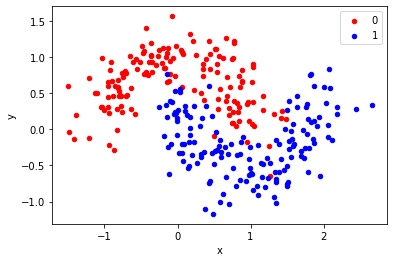

In [2]:
### This function allows to plot the two moons
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def plot_moons(X, y):
    df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
    colors = {0:'red', 1:'blue'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')

    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    plt.show()

plot_moons(X, y)

❓  Play with the number of samples and the noise to see the effect on the data, by plotting the moons for different values

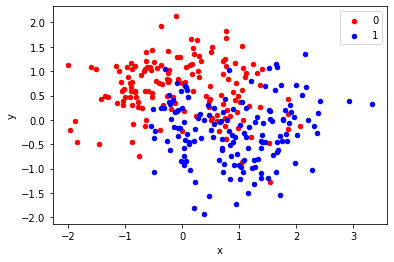

In [4]:
X_1, y_1 = make_moons(n_samples=300, noise=0.5, random_state=0)
plot_moons(X_1, y_1)

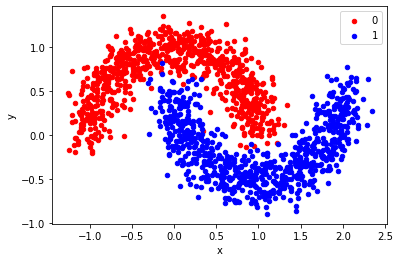

In [8]:
X_1, y_1 = make_moons(n_samples=1500, noise=0.15, random_state=0)
plot_moons(X_1, y_1)

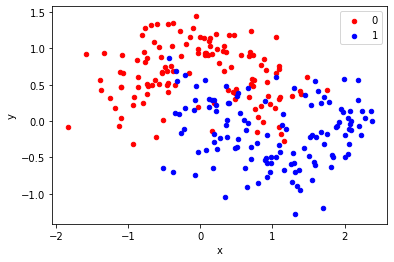

In [12]:
X_1, y_1 = make_moons(n_samples=250, noise=0.3, random_state=0)
plot_moons(X_1, y_1)

❓ Draw 250 samples of the data with a noise equal to 0.20 (random state being 0) and split the initial dataset into a train and test set (size: 70/30%)

Remark : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

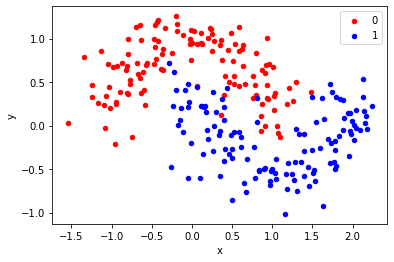

In [13]:
X_2, y_2 = make_moons(n_samples=250, noise=0.2, random_state=0)
plot_moons(X_2, y_2)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.3)

## 2. Simple model

You will now define your first neural network.
The architecture of your model should be : 
- a first layer with 5 neurons, with activation function being `relu` and the correct input dimension
- a output layer suited to your 2-class classification problem.


❓ Complete the next function (in the `#TODO`) with the previous architecture

In [15]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [16]:
def initialize_model():
    
    model = models.Sequential()

    model.add(layers.Dense(5, activation='relu', input_dim=2))

    model.add(layers.Dense(1, activation='sigmoid')) 
    
    ### Model optimization : Optimizer, loss and metric    
    model.compile(loss='binary_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    return model

model = initialize_model()

❗ **Remark** ❗ Briefly speaking, the compile tells your algorithm how to optimize the weights of your network once it will be fit onto real data. "binary_crossentropy" is the "log-loss" that you have already seen in Machine-Learning.

❓ How many parameters does the model have?  
Double check using the `summary` function that display the stack of layers, the shape of the output after each layer, and the number of parameters of each layer. Use this function to check that you have 21 parameters i.e. weights in your model.

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


You are now ready to train your algorithm on some data :

In [18]:
model = initialize_model()

history = model.fit(X_train, y_train, 
                    epochs=100,
                    batch_size=8,
                    verbose=0) # Try different verbose

### Fit history

`history` contains information about the training.

❓ Inspect all its attributes using `history.__dict__`. You will see epoch-by-epoch info stored in `history.history`

In [19]:
history.__dict__

{'validation_data': None,
 'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x1498f22e0>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.6332444548606873,
   0.625096321105957,
   0.6163239479064941,
   0.6065550446510315,
   0.5962651371955872,
   0.5850484371185303,
   0.5729836821556091,
   0.5607099533081055,
   0.5481616854667664,
   0.5348029732704163,
   0.5206363201141357,
   0.5062571167945862,
   0.4918743073940277,
   0.4775907099246979,
   0.4634408950805664,
   0.449314147233963,
   0.43534043431282043,
   0.42277994751930237,
   0.410165399312973,
   0.3987838327884674,
   0.38883060216903687,
   0.3789239823818207,
   0.3698484003543854,
   0.3612664043903351,
   0.3525186777114868,
   0.3448099195957184,
   0.33700135350227356,
   0.3302117586135864,
   0.32426708936691284,
   0.31925082206726074,
   0.3145103454589844,
   0.3109471797943115,
   0.3077385127544403,
   0.30353042483329773,
   0.3009614646434784,
   0.29

In [20]:
history.history

{'loss': [0.6332444548606873,
  0.625096321105957,
  0.6163239479064941,
  0.6065550446510315,
  0.5962651371955872,
  0.5850484371185303,
  0.5729836821556091,
  0.5607099533081055,
  0.5481616854667664,
  0.5348029732704163,
  0.5206363201141357,
  0.5062571167945862,
  0.4918743073940277,
  0.4775907099246979,
  0.4634408950805664,
  0.449314147233963,
  0.43534043431282043,
  0.42277994751930237,
  0.410165399312973,
  0.3987838327884674,
  0.38883060216903687,
  0.3789239823818207,
  0.3698484003543854,
  0.3612664043903351,
  0.3525186777114868,
  0.3448099195957184,
  0.33700135350227356,
  0.3302117586135864,
  0.32426708936691284,
  0.31925082206726074,
  0.3145103454589844,
  0.3109471797943115,
  0.3077385127544403,
  0.30353042483329773,
  0.3009614646434784,
  0.297940731048584,
  0.29546472430229187,
  0.293363481760025,
  0.2912640869617462,
  0.28904953598976135,
  0.28758499026298523,
  0.28589484095573425,
  0.28445345163345337,
  0.2830471098423004,
  0.2817324101924

❓ Plot the history of the train loss using the following function

In [21]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

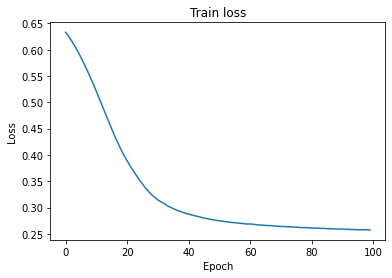

In [22]:
plot_history(history)

### Predict & Evaluate performance on test set

You can either predict `y_pred` using the `.predict()` method...

In [23]:
y_pred = model.predict(X_test)
y_pred

array([[0.9925703 ],
       [0.05120388],
       [0.9946091 ],
       [0.05952466],
       [0.42860174],
       [0.97817767],
       [0.07473555],
       [0.9822298 ],
       [0.05390328],
       [0.21280748],
       [0.02225709],
       [0.86772174],
       [0.9882989 ],
       [0.50718427],
       [0.89615   ],
       [0.0682601 ],
       [0.77108   ],
       [0.5908732 ],
       [0.98098814],
       [0.987347  ],
       [0.02097231],
       [0.00899774],
       [0.15863764],
       [0.31673157],
       [0.95137596],
       [0.0295555 ],
       [0.51172215],
       [0.96168923],
       [0.01322839],
       [0.90108   ],
       [0.04859775],
       [0.92004126],
       [0.49713716],
       [0.06164557],
       [0.01022187],
       [0.99576414],
       [0.01900083],
       [0.05817673],
       [0.27924177],
       [0.99318135],
       [0.8241192 ],
       [0.98225665],
       [0.1692046 ],
       [0.07745701],
       [0.963409  ],
       [0.4984744 ],
       [0.17107657],
       [0.935

Or you can also `evaluate()` method to directly return the loss value & performance metrics

In [24]:
model.evaluate(X_test, y_test, verbose=0)

[0.2776342034339905, 0.8799999952316284]

- The first element corresponds to the **loss** value, set to `"binary_crossentropy"` in `model.compile()`. Its value hard to interpret.

- The second element is the **metrics**, that we set to `"accuracy"`

❓ What is your accuracy on the test test?

In [25]:
accuracy = 0.8799999952316284

❓ Check your prediction visually using our `plot_decision_regions` available in `utils/plots.py`. It does look a bit underfitted, isn't it? We will create a deeper network next!

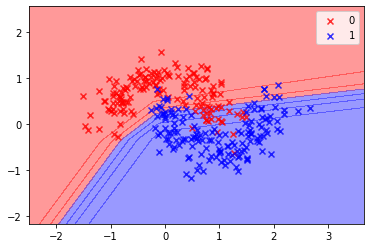

In [26]:
from utils.plots import plot_decision_regions
plot_decision_regions(X,y, model)

🧪 Test your code

In [27]:
from nbresult import ChallengeResult
result = ChallengeResult('first_model', accuracy=accuracy)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.6, pytest-6.2.3, py-1.10.0, pluggy-0.13.1 -- /Users/smrack/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8
cachedir: .pytest_cache
rootdir: /Users/smrack/code/olushO/data-challenges/06-Deep-Learning/01-Fundamentals-of-Deep-Learning/02-Your-first-Neural-Network
plugins: anyio-2.2.0, dash-1.20.0
collecting ... collected 1 item

tests/test_first_model.py::TestFirstModel::test_accuracy PASSED          [100%]

============================== 1 passed in 0.03s ===============================


💯 You can commit your code:

git add tests/first_model.pickle

git commit -m 'Completed first_model step'

git push origin master


## 3. Variations

❓ Relaunch the model on 500 iterations
- Don't forget to call the `initialize_model` function, otherwise, your initial parameters will be those you already learned on the previous fit!!)
- Plot the history to see how the loss changed over the different epochs/iterations.

In [30]:
model = initialize_model()

history = model.fit(X_train, y_train, 
                    epochs=500,
                    batch_size=8,
                    verbose=0) # Try different verbose

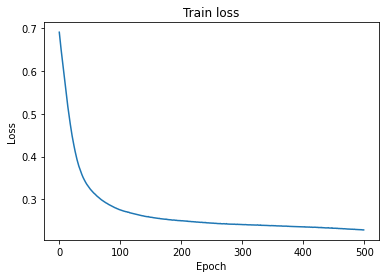

In [31]:
plot_history(history)

❓ Did the test accuracy improve?

In [32]:
model.evaluate(X_test, y_test, verbose=0)

[0.2765786051750183, 0.8666666746139526]

Not necessarily...So when to stop?
The answer will be seen tomorrow

❓ Let's try **deeper** architecture that includes : 

- a first layer with 20 neurons (activation being relu)
- a second layer with 10 neurons (activation being relu)
- a third layer with 5 neurons (activation being relu)
- an output layer suited for this problem


In [33]:
def initialize_model():
    
    model = models.Sequential()

    model.add(layers.Dense(20, activation='relu', input_dim=2))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(5, activation='relu'))
    
    model.add(layers.Dense(1, activation='sigmoid')) 
    
    ### Model optimization : Optimizer, loss and metric    
    model.compile(loss='binary_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    return model

model = initialize_model()

❓ What is the number of parameters of your new model?

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 20)                60        
_________________________________________________________________
dense_7 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 6         
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


Run your model on the previous data with 500 epochs and plot the loss afterwards.  
❓ What is your accuracy on the test test? Store it as `accuracy_deep`variable

In [35]:
history = model.fit(X_train, y_train, 
                    epochs=500,
                    batch_size=8,
                    verbose=0) # Try different verbose

In [36]:
model.evaluate(X_test, y_test, verbose=0)

[0.2904634475708008, 0.9066666960716248]

In [37]:
accuracy_deep = 0.9066666960716248

❓ Do you think we have overfitted on the noise? Check it out below

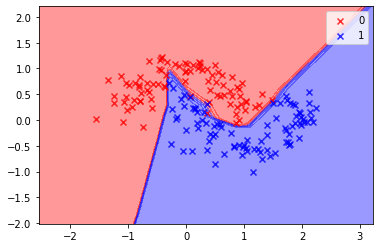

In [39]:
plot_decision_regions(X_train,y_train, model)  # ===> Looks like a bit overfitted !!!

🧪 **Test your code**

In [40]:
from nbresult import ChallengeResult
result = ChallengeResult('deeper_model',
                         accuracy=accuracy_deep)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.6, pytest-6.2.3, py-1.10.0, pluggy-0.13.1 -- /Users/smrack/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8
cachedir: .pytest_cache
rootdir: /Users/smrack/code/olushO/data-challenges/06-Deep-Learning/01-Fundamentals-of-Deep-Learning/02-Your-first-Neural-Network
plugins: anyio-2.2.0, dash-1.20.0
collecting ... collected 1 item

tests/test_deeper_model.py::TestDeeperModel::test_accuracy PASSED        [100%]

============================== 1 passed in 0.03s ===============================


💯 You can commit your code:

git add tests/deeper_model.pickle

git commit -m 'Completed deeper_model step'

git push origin master


🏁 **Congratulation! Push and commmit this notebook before moving to the next**